# The Ising Model

The Ising model is a theoretical model of a magnet. The magnetization of a magnetic material is made up of the combination of many small magnetic dipoles spread throughout the material. If these dipoles point in random directions then the overall magnetization of the system will be close to zero, but if they line up so that all or most of them point in the same direction then the system can acquire a macroscopic magnetic moment - it becomes magnetized. The Ising model is a model of this process in which the individual moments are represented by dipoles or "spins" arranged on a grid or lattice. In this case we are using a square lattice in two dimensions, although the model can be defined in principle for any lattice in any number of dimensions.

The spins themselves, in this simple model, are restricted to point in only two directions, up and down. Mathematically the spins are represented by variables $s_i = \pm1$ on the points of the lattice, 
$+1$ for up-pointing spins and $-1$ for down-pointing ones. Dipoles in real magnets can typically point in any spatial direction, not just up or down, but the Ising model, with its restriction to just the two directions, captures a lot of the important physics while being significantly simpler to understand.

Another important feature of many magnetic materials is that the individual dipoles in the materials may interact in such a way that it is energentically favorable for them to line up in the same direction. The magnetic potential energy due to the interaction of the two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the interactions are ferromagnetic, meaning the energy is lower when the dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjecent to them on the lattice, which gives a total energy for the entire system equal to

$E = -J\sum \limits_{\langle ij\rangle } s_i s_j$

where the notation $\langle ij \rangle$  indicates a sum over pairs $i,j$ that are adjacent on the lattice. O the square

In [33]:
import ising
from random import random,randrange
import numpy as np
from math import exp
from pylab import plot,show,xlabel,ylabel,title,ylim,legend

## 1. Using energy function of ising model as the basis for the Metropolis-style simulation

In [57]:
s = ising.s
L = ising.L

print(ising.M)

steps = 10000


def changestate(s,steps,T = 1):    
    column = randrange(0,L)
    row = randrange(0,L)
    
    state = np.empty((L,L))
        
    dummy = np.copy(s)
    dummy[column,row] = -1 * s[column,row]

    Ei = ising.energy(s)
    Ej = ising.energy(dummy)
    
    if (Ej <= Ei):
        state = np.copy(dummy)
    else:
        P = exp((Ei-Ej)/T)
        z = random()      
        
        if(z < P):
            state = np.copy(dummy)
        else:
            state = np.copy(s)
    return state

# def mag(s,steps,T = 1):
#     M = np.zeros(steps)
#     for k in range(steps):       
#         for i in range(L):
#             for j in range(L):
#                 M[k] += s[i,j]
#         s = np.copy(changestate(s,steps,T))
#     return M

def mag(s,steps,T = 1):
    M = np.zeros(steps)
    for k in range(steps):
        M[k] += np.sum(s)
        s = np.copy(changestate(s,steps,T))
    return M

8


## 2. Plotting total magnetization of the system as a function of time

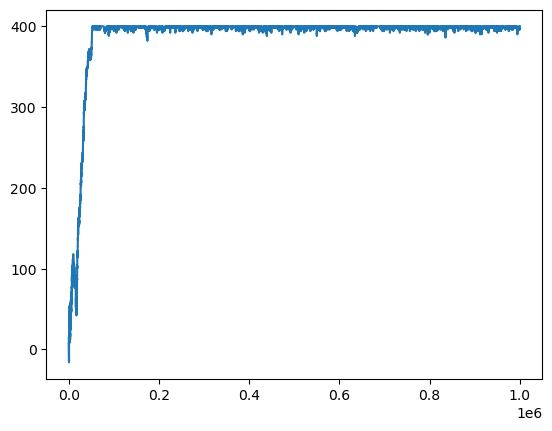

In [82]:
t = range(1000000)
plot(t,mag(s,1000000))
show()

## 3. Running program 10 times

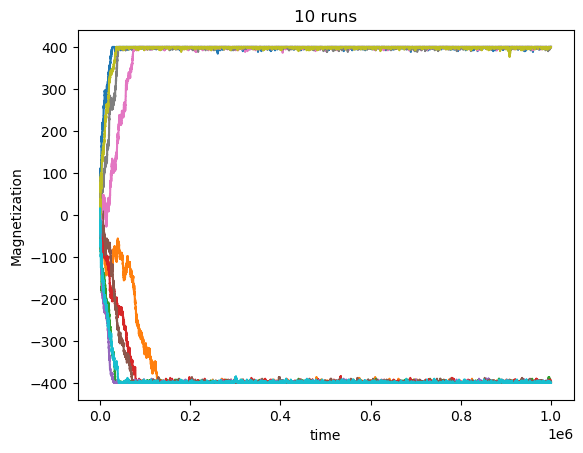

In [83]:
t = range(1000000)

for p in range(10):
    plot(t,mag(s,1000000))

xlabel('time')
ylabel('Magnetization')
title('10 runs')
show()

Over time, the moments throughout the magnet flip and align in one direction because they will tend to be oriented a way that takes the least amount of energy.

## 4. Changing T

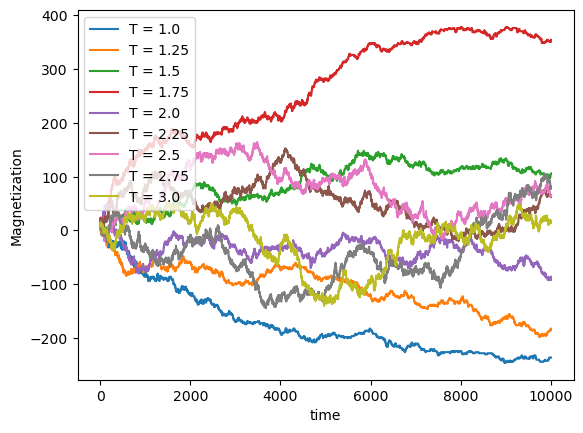

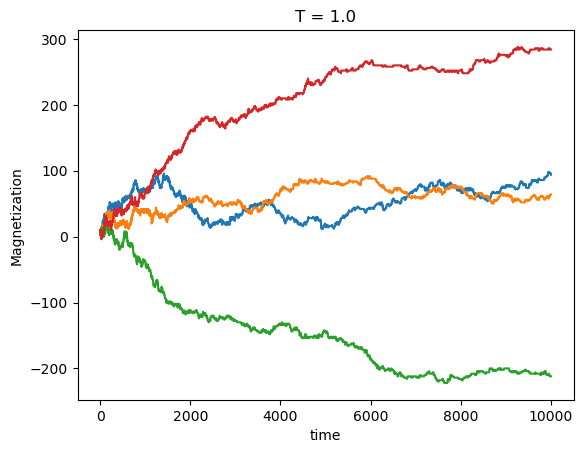

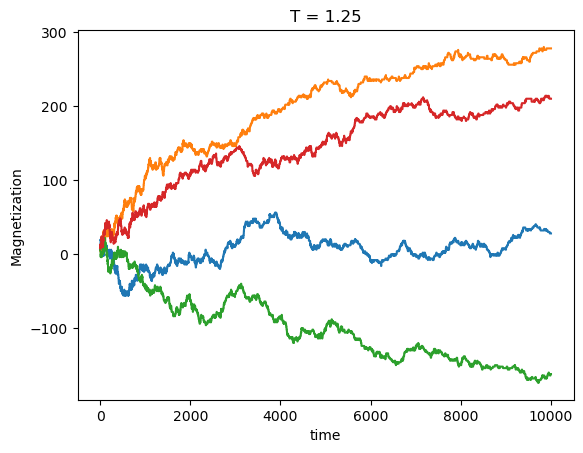

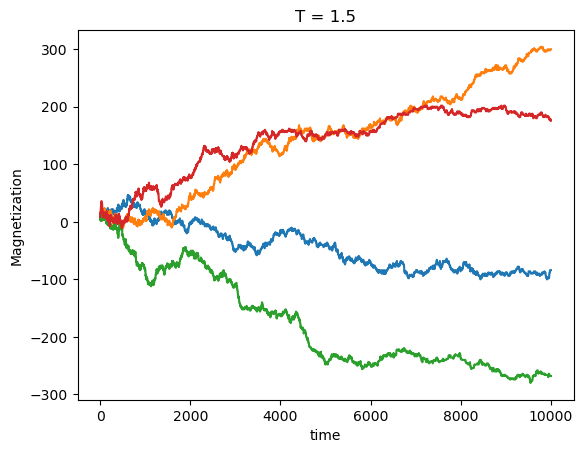

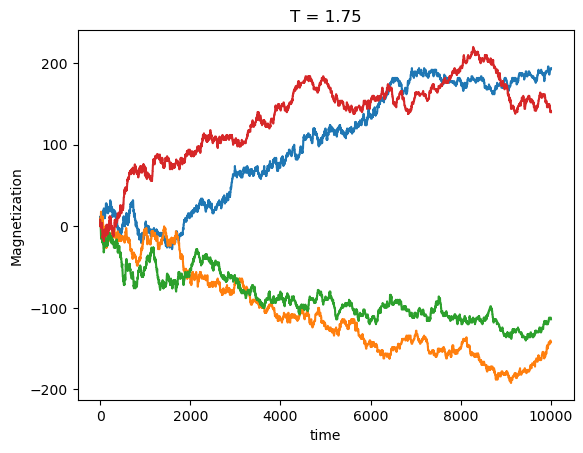

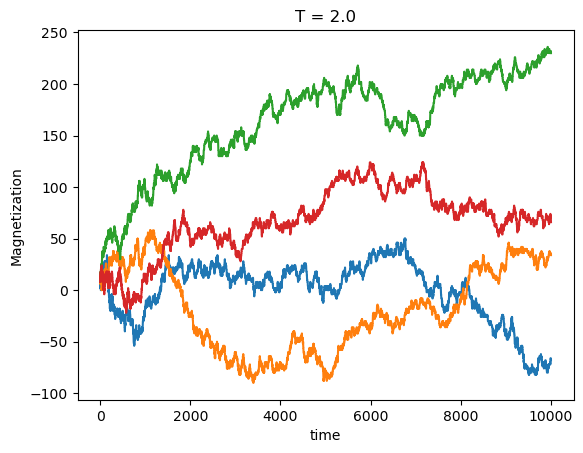

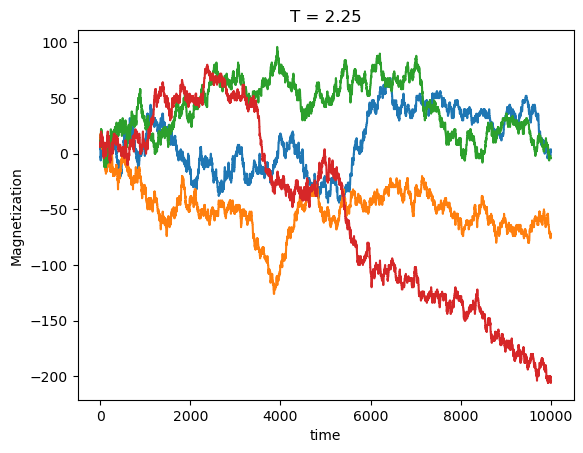

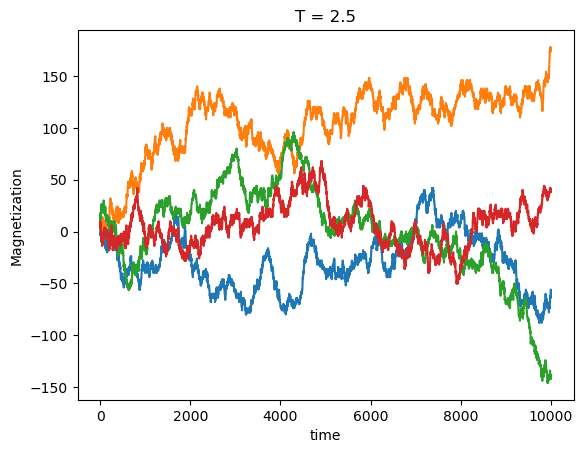

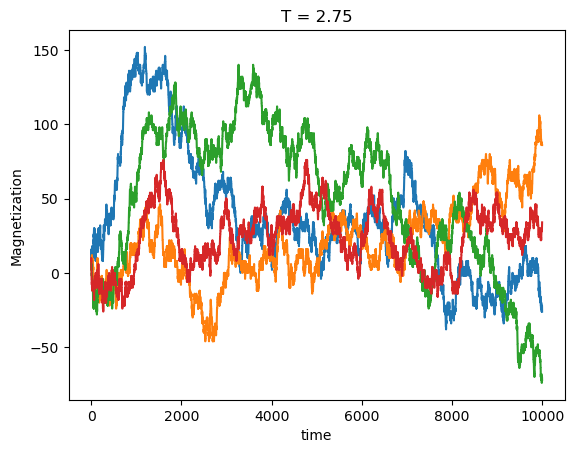

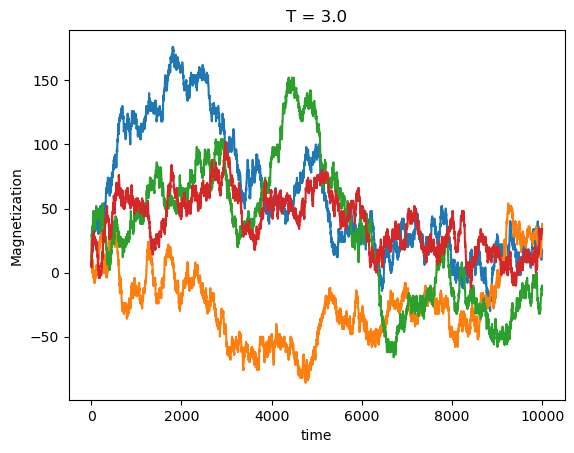

In [87]:
q = np.arange(1,3.25,0.25)
steps = 10000
t = range(steps)

for i in q:
    plot(t,mag(s,steps,i),label = 'T = %s' % i)
    xlabel('time')
    ylabel('Magnetization')
legend(loc = 'upper left')
title()
show()

for i in q:
    for p in range(4):
        m = mag(s,steps,i)
        plot(t,m)
        xlabel('time')
        ylabel('Magnetization')
        
    title('T = %s' % i)    
    show()
    

### Average magnetization as a function of temperature

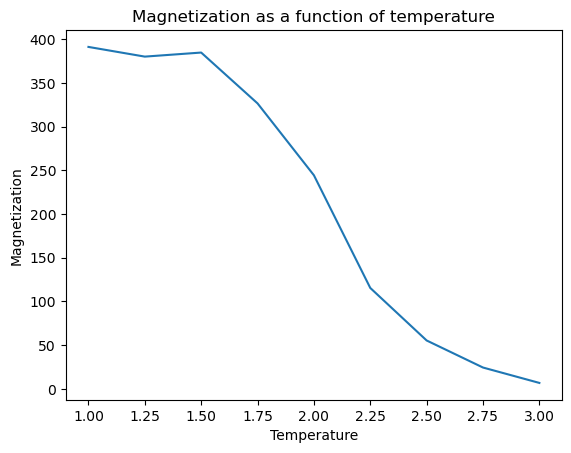

In [75]:
q = np.arange(1,3.25,0.25)
steps = 500000

def M_avg(s):   
    M_avg_list = []  
    
    for tau in q:
        m = mag(s,steps,tau)
        M_avg_list.append(abs(np.mean(m)))
               
    return M_avg_list
     
m = M_avg(s)
    
plot(q,m)
xlabel('Temperature')
ylabel('Magnetization')
title('Magnetization as a function of temperature')
show()

Average magnetization decreases as the temperature of the magnet increases. This is because the higher the temperature, the higher the internal energy of the magnet, causing the molecules to vibrate and misalign moments.

## 5. Specific heat

In [68]:
#find the energy of each (i,j)

def Eij(s,L=20):
    J = 1.0   
    e = np.zeros([L,L],int)
    
    for i in range(L):
        for j in range(L):
            C = -J * s[i,j]
            
            if (i-1 >= 0):
                e[i,j] += C * s[i-1,j]
            if (i+1 <= L-1):
                e[i,j] += C * s[i+1,j]
            if (j-1 >= 0):
                e[i,j] += C * s[i,j-1]
            if (j+1 <= L-1):
                e[i,j] += C * s[i,j+1]           
    return e

# heat capacity

def C(s,steps,T=1):   
    heat = np.zeros(steps)     
    for k in range(steps):   
        s = np.copy(changestate(s,steps))

        # square each energy
        eij = Eij(s)

        E_2 = np.zeros([L,L],int)
        for i in range(L):
            for j in range(L):
                E_2[i,j] += eij[i,j]**2
    
        # adding the square of each energy        
        E_2sum = 0
        for i in range(L):
            for j in range(L):
                E_2sum += E_2[i,j]
            
        # square total energy
        totE2 = ising.energy(s)**2  
        
        heat[k] += (E_2sum + totE2)/(L*L*T*T)
       
    return heat



### Plotting different temperatures on the same graph

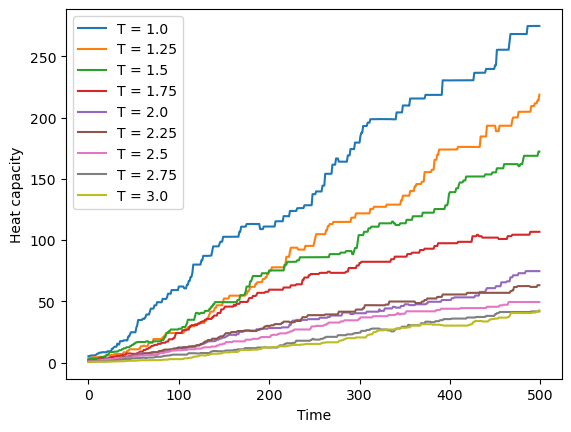

In [150]:
q = np.arange(1,3.25,0.25)
steps = 500
t = range(steps)

for tau in q: 
    plot(t,C(s,steps,tau),label = 'T = %s' % tau)
        
legend(loc = 'upper left') 
xlabel('Time')
ylabel('Heat capacity')
show()

### Several runs of each temperature on seperate graphs

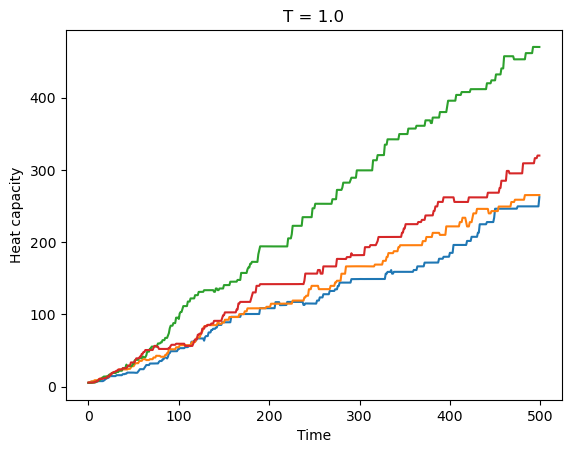

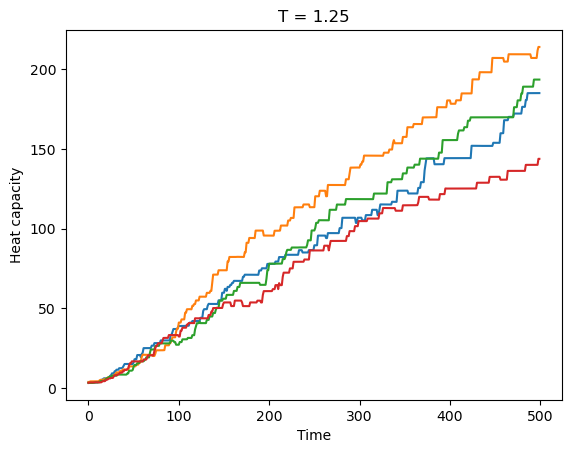

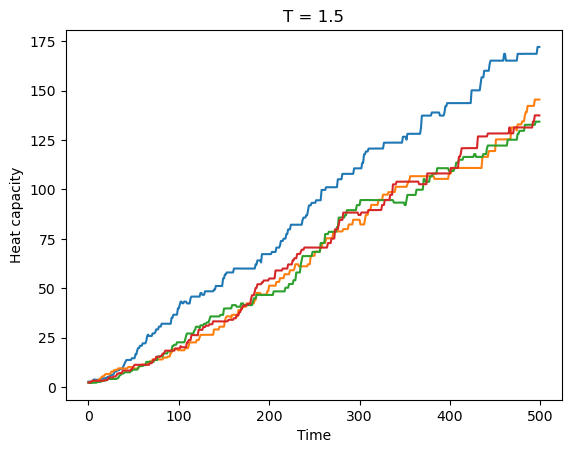

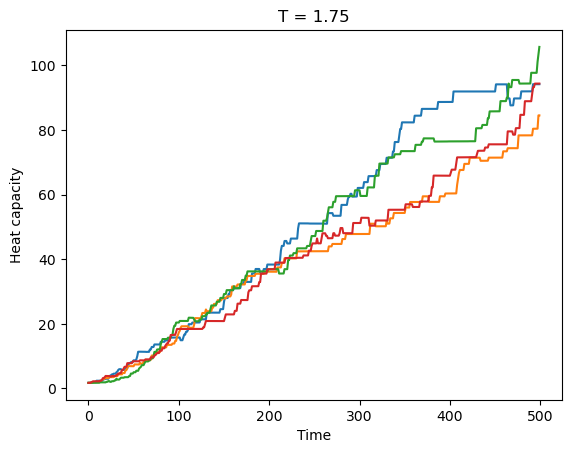

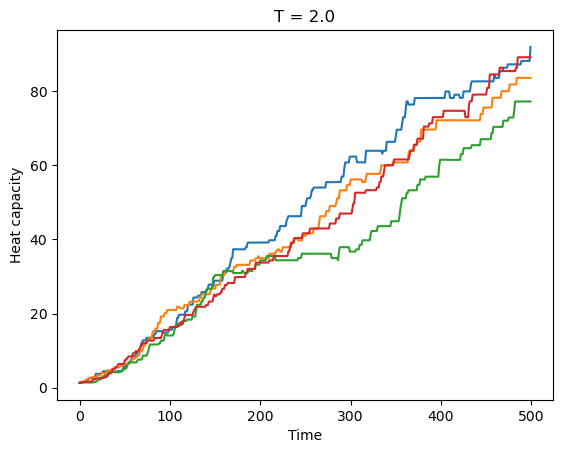

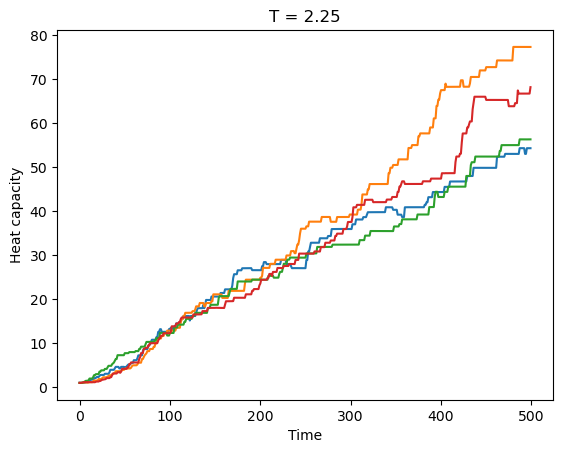

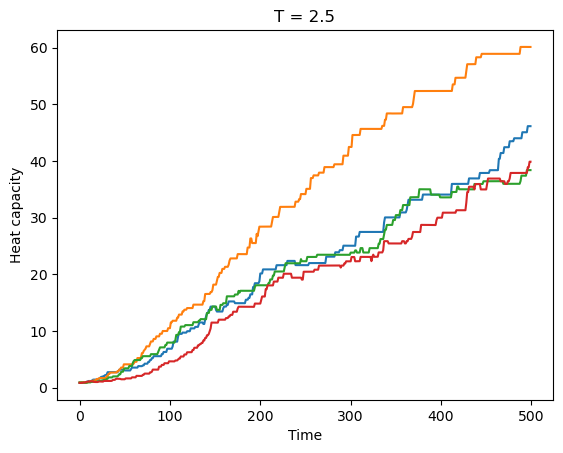

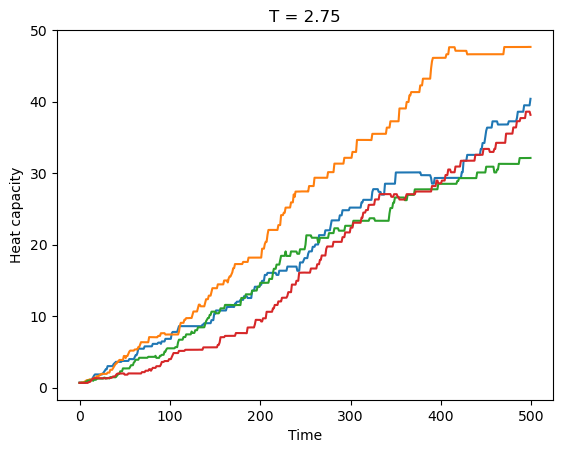

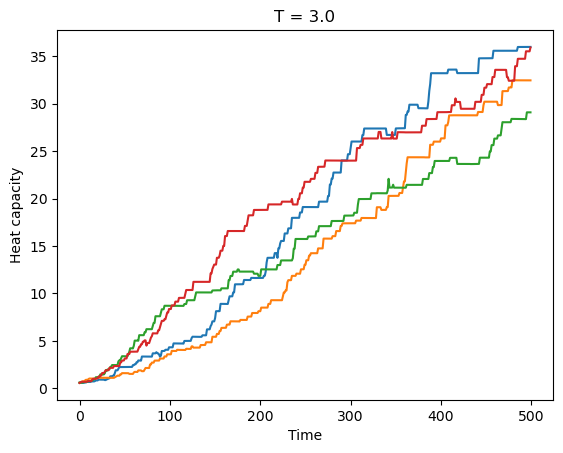

In [169]:
steps = 500
t = range(steps)

for tau in q:
    for p in range(4):
        plot(t,C(s,steps,tau))
    title('T = %s' % tau)
    xlabel('Time')
    ylabel('Heat capacity')
    show()        

### Average heat capacity as a function of temperature

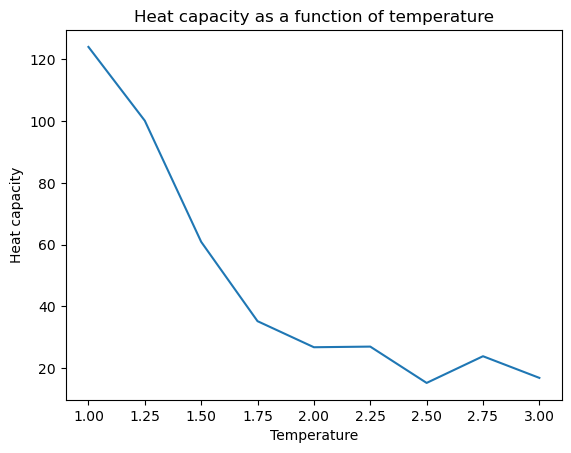

In [70]:
steps = 500

def C_avg(s,steps):   
    
    avg = 0
    C_avg_list = []

    for tau in q:
        C_list = C(s,steps,tau)
        
        for k in range(steps):
            avg += C_list[k]
            
        avg /= steps        
        C_avg_list.append(avg)
      
    return C_avg_list

plot(q,C_avg(s,steps)) 
xlabel('Temperature')
ylabel('Heat capacity')
title('Heat capacity as a function of temperature')
show()

The heat capacity of the magnet decreases as temperature increases. When the temperature of the magnet is lowest, there are many possible magnetic moments that can be excited, so the capacity to increase the temperature is greatest. As we increase the temperature, magnetic moments are excited and their alignments are changed, so there are less potential unexcited magnetic moments to excite-- hence the capacity to increase the temperature of the magnet decreases.